In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_decision_regions

In [2]:
df = sns.load_dataset('iris')
print("IRIS DATASET LOAD SUCCESSFULLY ....")
df.head()

IRIS DATASET LOAD SUCCESSFULLY ....


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df = df[['sepal_length', 'petal_length', 'species']]
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [5]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [7]:
multinomial_log_res = LogisticRegression(multi_class = 'multinomial')
multinomial_log_res.fit(X_train, y_train)
multinomial_log_res_pred = multinomial_log_res.predict(X_test)

In [8]:
print("Accuracy Score: ", accuracy_score(y_test, multinomial_log_res_pred))

Accuracy Score:  0.9666666666666667


In [9]:
print("Confusion Matrix: \n", confusion_matrix(y_test, multinomial_log_res_pred))

Confusion Matrix: 
 [[14  0  0]
 [ 0  7  1]
 [ 0  0  8]]


In [10]:
print("Confusion Matrix in Fancy terms")
pd.DataFrame(confusion_matrix(y_test, multinomial_log_res_pred))

Confusion Matrix in Fancy terms


,0,1,2
0,14,0,0
1,0,7,1
2,0,0,8


In [11]:
"""
Here, the predict_proba is the function where it perdicts the probability for the all three classes that are present.
All those three classes are: Iris setosa, Iris versicolor, and Iris virginica.
"""
# Probability Prediction
query = np.array([[3.4, 2.7]])
print("Iris Setosa, Iris Versicolor, Iris Virginica probabilities: ")
multinomial_log_res.predict_proba(query)

Iris Setosa, Iris Versicolor, Iris Virginica probabilities: 


array([[7.25865651e-01, 2.73720718e-01, 4.13631316e-04]])

In [12]:
multinomial_log_res.predict(query)

array([0])

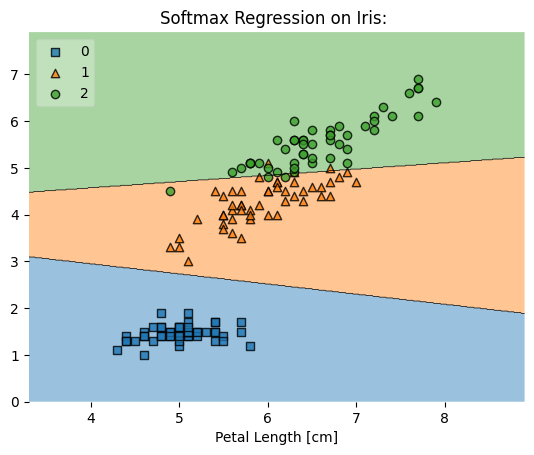

In [13]:
plot_decision_regions(X.values, y.values, multinomial_log_res, legend = 2)

# Adding Axes Annotations
plt.xlabel('Sepal Length [cm]')
plt.xlabel('Petal Length [cm]')
plt.title("Softmax Regression on Iris: ")
plt.show()